In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from network import Model

from scipy.stats import pearsonr
import json
from tools_lnd import rule_set_names, remove_ax_lines, remove_ticks, remove_spines

In [2]:
figpath = os.path.join(p,'code','overleaf','multitask-nets','v5_figs','paper_figs','fig3','dendro_end')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [3]:
task_name_dict = {}
task_name_dict['Dly Anti'] = rule_set_names[5]
task_name_dict['RT Go'] = rule_set_names[1]
task_name_dict['Dly Go'] = rule_set_names[2]
task_name_dict['RT Anti'] = rule_set_names[4]
task_name_dict['Anti'] = rule_set_names[3]
task_name_dict['Go'] = rule_set_names[0]
task_name_dict['DNMS'] = rule_set_names[12]
task_name_dict['DMS'] = rule_set_names[11]
task_name_dict['DMC'] = rule_set_names[13]
task_name_dict['DNMC'] = rule_set_names[14]
task_name_dict['Dly DM 2'] = rule_set_names[7]
task_name_dict['Dly DM 1'] = rule_set_names[6]
task_name_dict['Ctx Dly DM 2'] = rule_set_names[9]
task_name_dict['Ctx Dly DM 1'] = rule_set_names[8]
task_name_dict['MultSen Dly DM'] = rule_set_names[10]

In [4]:
feature_names_master = ['DMS delay1', 'DMS go1', 'RT Go go1', 'DMC go1', 'DNMC go1',
       'DNMS delay1', 'DNMS go1', 'Dly DM 2 stim2', 'Ctx Dly DM 2 stim2',
       'Dly DM 1 stim2', 'Ctx Dly DM 1 stim2', 'MultSen Dly DM stim2',
       'DMS stim1', 'DMC stim1', 'Go stim1', 'Dly Go stim1',
       'Ctx Dly DM 2 stim1', 'Ctx Dly DM 1 stim1', 'MultSen Dly DM stim1',
       'Dly DM 1 stim1', 'Dly DM 2 stim1', 'RT Anti go1', 'DMC delay1',
       'DNMC delay1', 'Anti stim1', 'Dly Anti stim1', 'DNMS stim1',
       'DNMC stim1', 'Ctx Dly DM 2 go1', 'Ctx Dly DM 1 go1',
       'MultSen Dly DM go1', 'Anti go1', 'Go go1', 'Dly DM 1 go1',
       'Dly DM 2 go1', 'Dly Go go1', 'Dly Anti go1',
       'MultSen Dly DM delay2', 'Ctx Dly DM 1 delay1',
       'MultSen Dly DM delay1', 'Dly DM 1 delay1', 'Dly DM 2 delay1',
       'Ctx Dly DM 1 delay2', 'Ctx Dly DM 2 delay1',
       'Ctx Dly DM 2 delay2', 'Dly Anti delay1', 'Dly Go delay1',
       'Dly DM 1 delay2', 'Dly DM 2 delay2']

In [5]:
m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1'

In [6]:
from analysis import variance
variance.compute_variance(m)

/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1
/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1
Overwrite sigma_rec with 0.000
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/la

In [7]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from analysis import clustering, standard_analysis, variance
from task import generate_trials, rule_name, rules_dict
from tools_lnd import find_opt_clust_num

def make_dendro_end(m,method = 'ward',criterion = 'distance',cel_max_d = 0,max_d = 0, normalization_method='max'):

    CA = clustering.Analysis(m, data_type='epoch', normalization_method=normalization_method)
    tick_names = [rule_name[key[0]]+' '+key[1] for key in CA.keys]

    # Generate features and distance matrix.
    D  = CA.h_normvar_all.T

    # Compute and plot dendrogram.
    fig = plt.figure(figsize=(24, 15))
    axdendro = fig.add_axes([0.09,0.1,0.05,0.75])

    Y = sch.linkage(D, method=method)

    if max_d==0:
        max_d = find_opt_clust_num(D,Y)
        clusters = fcluster(Y, max_d, criterion='maxclust')
    else:
        clusters = fcluster(Y, max_d, criterion=criterion)
    Z = sch.dendrogram(Y, orientation='left',labels = tick_names,
                       leaf_font_size = 11,color_threshold=max_d)

    axdendro.set_xticks([])
    axdendro.spines['top'].set_visible(False)
    axdendro.spines['right'].set_visible(False)
    axdendro.spines['bottom'].set_visible(False)
    axdendro.spines['left'].set_visible(False)

    # Plot distance matrix.
    axmatrix = fig.add_axes([0.22,0.1,0.75,0.75])
    index_left = Z['leaves']
    tick_names_sorted = [tick_names[i] for i in index_left]
    D = D[index_left,:]

    # cel_num = [CA.ind_active[x] for x in index_top]
    axdendro_top = fig.add_axes([0.22,.9,0.75,0.1])
    Y = sch.linkage(D.T, method=method)
    if cel_max_d==0:
        lesion_folder = 'lesion_fps_hierarchical_'+method+'_'+criterion+'_opt_clust'
        cel_max_d = find_opt_clust_num(D.T,Y)
        clusters = fcluster(Y, cel_max_d, criterion='maxclust')
    else:
        lesion_folder = 'lesion_fps_hierarchical_'+method+'_'+criterion+'_max_d'+str(cel_max_d)
        clusters = fcluster(Y, cel_max_d, criterion=criterion)
    Z = sch.dendrogram(Y, orientation='top',labels = clusters, #CA.ind_active #clusters
                   leaf_font_size = 11,color_threshold=cel_max_d)

    # axdendro_top.set_xticks([])
    axdendro_top.set_yticks([])

    index_top = Z['leaves']
    D = D[:,index_top]
    clusters_sorted = clusters[index_top]
    im = axmatrix.matshow(D, aspect='auto', origin='lower',cmap='magma')
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.975,0.1,0.01,0.8])
    plt.colorbar(im, cax=axcolor)

    lesion_units_list = [None]
    for il, l in enumerate(np.unique(clusters)):
        ind_l = np.where(clusters == l)[0]
        # In original indices
        lesion_units_list += [CA.ind_active[ind_l]]

    # save cluster variables
    cluster_var = {'D':D,'Z':Z,
                'index_top':index_top,
                'index_left':index_left,
                'tick_names':tick_names_sorted,
                'clusters':clusters_sorted,
                'lesion_units_list':lesion_units_list,
                'max_d':cel_max_d,
                'criterion':criterion,
                'method':method}

    save_dir = os.path.join(m,lesion_folder)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    np.savez(os.path.join(save_dir,'cluster_var_end.npz'),**cluster_var)
    plt.savefig(os.path.join(save_dir,'dynamic_modules_atlas_end'+'.pdf'))

Choosing 37 clusters


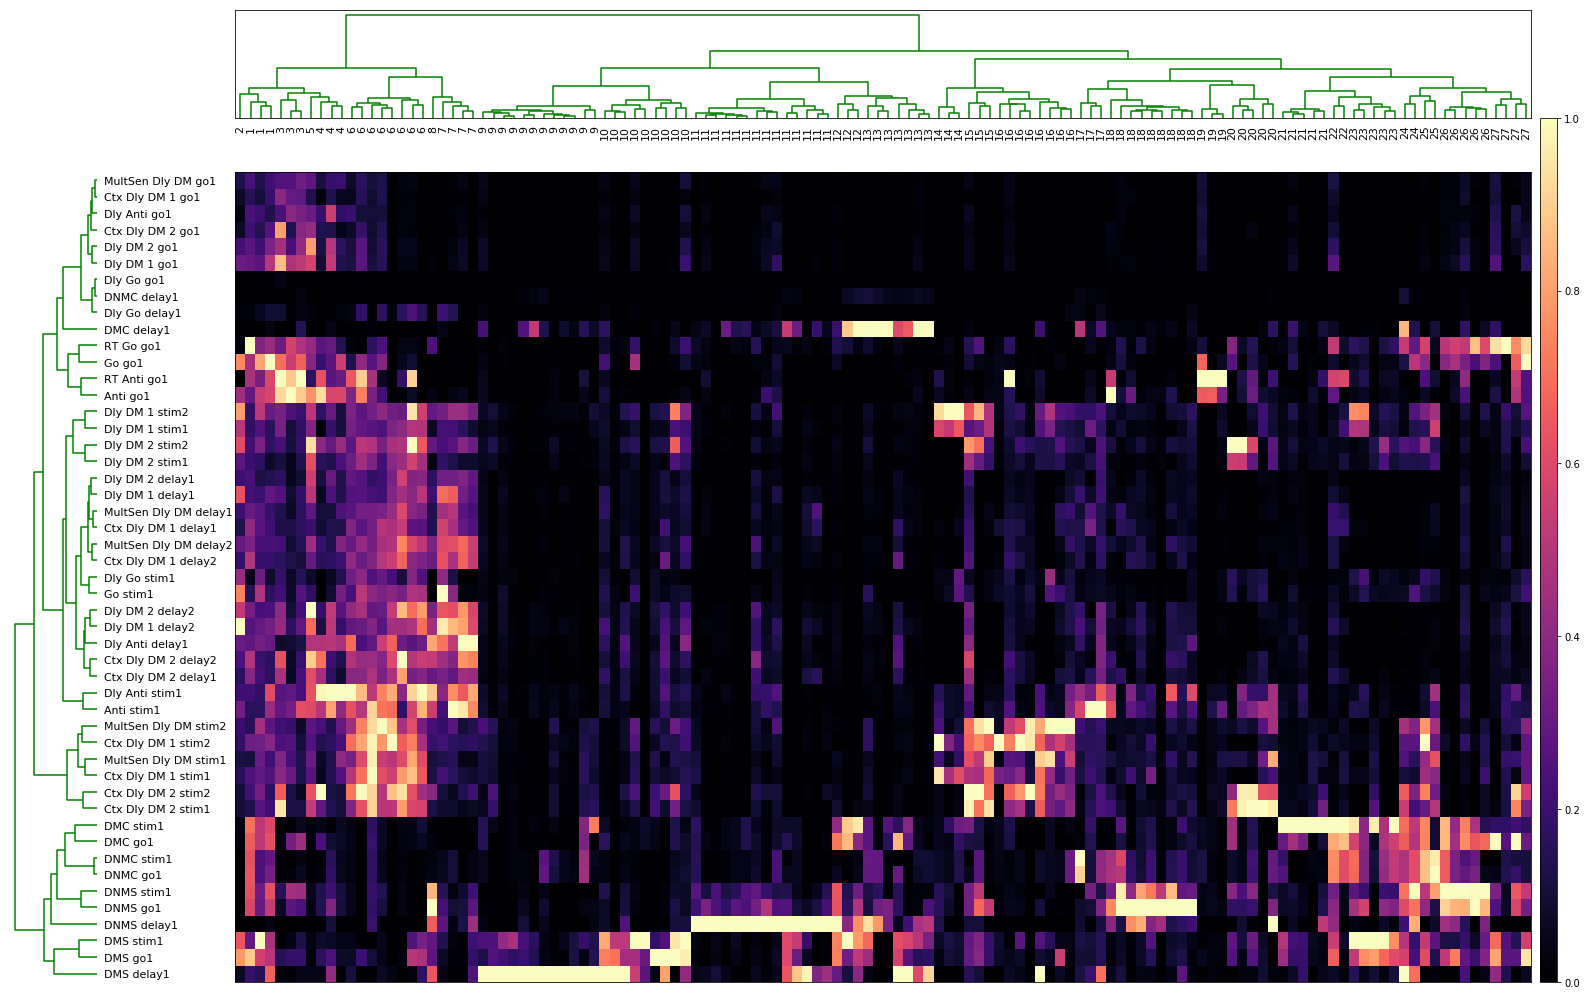

In [8]:
make_dendro_end(m)

In [11]:
def make_cluster_midpoint_labels(clust):
    d = np.concatenate(([-1], np.where(np.diff(clust))[0],[len(clust)-1]),axis = 0)
    mid = np.zeros(len(d))
    cluster_size = np.zeros(len(d))
    for xi in range(len(d)-1):
        cluster_size[xi] = d[xi+1] - d[xi]
        mid[xi] = d[xi+1]-cluster_size[xi]/2+.5
    return cluster_size, mid

def plot_epoch_labels(ax, epoch_binary, which_axes = 'y', ms = 3.5):
    
    e_set = ['stim1','stim2','delay1','delay2','go1']
    e_color = plt.get_cmap('terrain')

    yl = np.max(ax.get_ylim())+2
    xl = np.max(ax.get_xlim())+2
    
    for ei in range(len(e_set)):
        e_name = e_set[ei]
        c = e_color(ei/len(e_set))
        
        if 'y' in which_axes:
            
            ax.plot(np.where(epoch_binary[e_name])[0],
                     yl*np.ones(np.sum(epoch_binary[e_name])),'s',
                     color = c,markersize = ms,label = e_name)
            
        if 'x' in which_axes:
            
            ax.plot(xl*np.ones(np.sum(epoch_binary[e_name])),
                     np.where(epoch_binary[e_name])[0],'s',
                     color = c,markersize = ms,label = e_name)
            
            
def plot_epoch_rects(ax, epoch_binary, e_set, which_axes = 'y', rect_height = 1, rect_width = 58, ll = []):
    e_color = plt.get_cmap('terrain')

    if len(ll)>0:
        xl = ll[1]
        yl = ll[0]
    else:
        yl = np.max(ax.get_ylim())+2
        xl = np.max(ax.get_xlim())+2

        
    for ei in range(len(e_set)):
        e_name = e_set[ei]
        c = e_color(ei/len(e_set))
        
        if 'y' in which_axes:
            
            for ind in np.where(epoch_binary[e_name])[0]:
                rect=mpatches.Rectangle((ind-.5,yl),rect_height,rect_width,
                                        fill=True,color=c,facecolor=c,alpha = .3,clip_on=False)
                plt.gca().add_patch(rect)
            
        if 'x' in which_axes:
            
            for ind in np.where(epoch_binary[e_name])[0]:
                rect=mpatches.Rectangle((xl,ind-.5),rect_height,rect_width,
                                        fill=True,color=c,facecolor=c,alpha = .3,clip_on=False)
                plt.gca().add_patch(rect)
        

In [14]:
m_master = m
lesion_folder = 'lesion_fps_hierarchical_ward_distance_opt_clust'
save_dir = os.path.join(m_master,lesion_folder)
cluster_var = np.load(os.path.join(save_dir,'cluster_var_end.npz'))
feature_names_master = cluster_var['tick_names']
feature_names_labels = [feat_name.rsplit(' ', 1)[0] for feat_name in feature_names_master]

epoch_binary = {}
for e_name in ['delay1','delay2','go1','stim1','stim2']:
    epoch_binary[e_name] = [feat_name.rsplit(' ', 1)[-1]==e_name for 
                            feat_name in feature_names_master]

In [15]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 100, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        print(i)
        if d_old!=0 and d/d_old < 1 + tol: break
    return R, dot(Phi, R)

In [17]:
from scipy.cluster import hierarchy
color_palette = ['k','c', 'm', 'y']
hierarchy.set_link_color_palette(color_palette)

In [21]:
from scipy.cluster import hierarchy
color_palette = ['b','c', 'm', 'y', 'r']
color_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                 '#e41a1c', '#dede00']
hierarchy.set_link_color_palette(color_palette)
alphabet = {1:'a', 2:'b', 3:'c', 4:'d', 5:'e', 6:'f', 7:'g', 8:'h', 9:'i', 10:'j', 11:'k', 12:'l', 13:'m', 
            14:'n', 15:'o', 16:'p', 17:'q', 18:'r', 19:'s', 20:'t', 21:'u', 22:'v', 23:'w', 24:'x', 25:'y', 
            26:'z',27:'aa',28:'bb',29:'cc',30:'dd',31:'ee',32:'ff',33:'gg',34:'hh',35:'ii',36:'jj',37:'kk',
            38:'ll',39:'mm',}

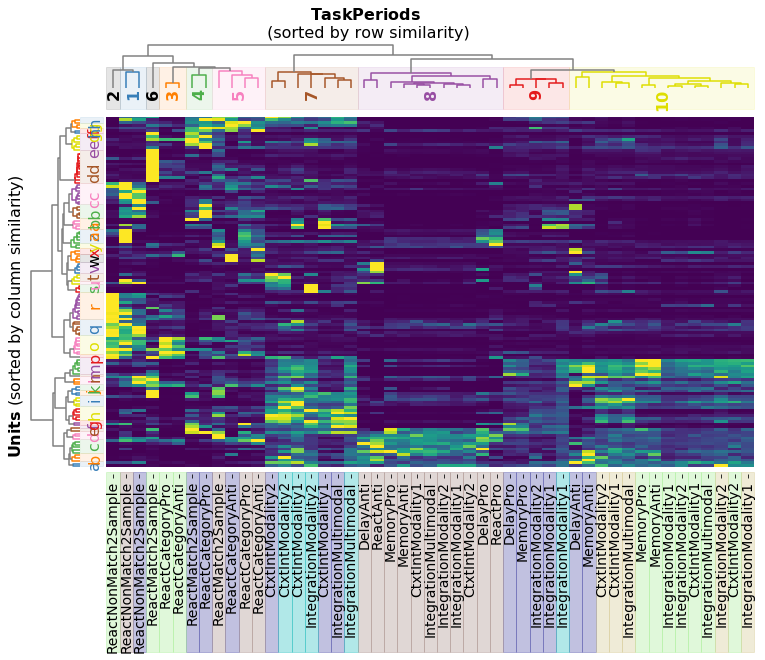

In [22]:
import matplotlib.patches as mpatches

method = 'ward'
criterion = 'distance'
cel_max_d = 0
max_d = 0
normalization_method='max'#max'
all_epochs = ['stim1','stim2','delay1','delay2','go1']

                    

#visualize atlas for master network
fig = plt.figure(figsize=(18,9))
plt.rcParams.update({'font.size': 16})
legend_done = 0
atlas_width = .55
atlas_height = .55
thresh = 4

X = cluster_var['D'].T

axdendro_top = fig.add_axes([.06,atlas_height+.09,atlas_width-.05,.07])
Y = sch.linkage(X.T, method=method)
clusters_top = fcluster(Y, thresh, criterion=criterion)
Z_top = sch.dendrogram(Y, orientation='top',#labels = clusters, #CA.ind_active #clusters
                   leaf_font_size = 11,color_threshold=thresh,
                          above_threshold_color='gray', labels = clusters_top)
#                     plt.text(-96,-18,'Task Period \n Cluster #')

cluster_size,mid_top = make_cluster_midpoint_labels(clusters_top)
for xi in range(len(mid_top)-1):
    if cluster_size[xi]==1:
        c = 'k'
    else:
        color_ind = xi - np.sum(cluster_size[:xi]==1)
        c = color_palette[color_ind%len(color_palette)]
    clust_mid = mid_top[xi]
    rect=mpatches.Rectangle((5+10*(clust_mid-cluster_size[xi]/2),-5),cluster_size[xi]*10,10, 
    fill=True,color=c,facecolor=c,alpha = .1,clip_on=False)
    plt.gca().add_patch(rect)
    plt.text(clust_mid*10,-3,str(clusters_top[int(clust_mid)]),color=c,fontweight='bold',rotation = 90)
#                         plt.text(xi*10,-15,str(clusters_sorted[int(xi)]))

remove_spines(axdendro_top)
remove_ticks(axdendro_top)
axdendro_top.set_xticks([])

axdendro = fig.add_axes([0,.054,0.04,atlas_height*.98])
Y = sch.linkage(X, method=method)
clusters = fcluster(Y, max_d, criterion=criterion)

Z = sch.dendrogram(Y, orientation='left',#labels = clusters, #CA.ind_active #clusters
                   leaf_font_size = 11,color_threshold=2.07,
                          above_threshold_color='gray', labels = clusters)

clusters = cluster_var['clusters']
#                     Z = cluster_var['Z']

cluster_size, mid = make_cluster_midpoint_labels(clusters)
for xi in range(len(mid)-1):

    if xi>22:
        ci = xi-1
    else:
        ci = xi

    c = color_palette[ci%len(color_palette)]

    if xi==22:
        c = 'k'

    clust_mid = mid[xi]
    rect=mpatches.Rectangle((-5,10+10*(clust_mid-cluster_size[xi]/2)),5,cluster_size[xi]*10, 
    fill=True,
    color=c,facecolor=c,alpha = .1,clip_on=False)
    plt.gca().add_patch(rect)
    plt.text(-1.5,10*clust_mid-20,alphabet[clusters[int(clust_mid)]],color =c,rotation = 90)

remove_spines(axdendro)
remove_ticks(axdendro)
axdendro.set_xticks([])


axmatrix = fig.add_axes([.06,0.045,atlas_width-.05,atlas_height])#fig.add_subplot(1,2,1)
index_top = Z['leaves']
X = X[index_top,:]
plt.imshow(X[-1:0:-1,:],cmap= 'viridis', aspect='auto')

len_te = len(feature_names_labels)
axmatrix.set_xticks(range(len_te))
task_labels = [task_name_dict[feat] for feat in feature_names_labels]
axmatrix.set_xticklabels(task_labels,fontsize = 14, rotation =90,ha = 'center')
#                     plot_epoch_labels(axmatrix,epoch_binary,which_axes = 'y',ms = 12.5)
plot_epoch_rects(axmatrix,epoch_binary,all_epochs,which_axes = 'y', rect_height = 1, rect_width = 65)
#                     plt.legend(bbox_to_anchor=(1.1, -.13),ncol=2,fontsize = 14,rotation = 90)    

plt.text(-8,len(X)/5,r"$\bf{Units}$"+' (sorted by column similarity)',rotation = 90)
# plt.text(-8,1.2*len(X),r"$\bf{Example Network}$"+ ' \n '+' \n '.join(label_master.split()),rotation = 90)
axmatrix.set_xlabel(r"$\bf{Task Periods}$"+ ' \n (sorted by row similarity)')
axmatrix.xaxis.set_label_coords(.4, 1.31)
remove_spines(axmatrix)
axmatrix.set_yticks([])
plt.ylim((len(X)+1,0))

# make subpanels.
sp_width = .14
sp_wide = .2
offset = .06

# label = '_'.join([rnn_type,activation,w_init,seed])
figname = os.path.join('atlas_end.pdf')
figpath_full = os.path.join(figpath,'atlas_end')
if not os.path.exists(figpath_full):
    os.makedirs(figpath_full)
plt.savefig(os.path.join(figpath_full,figname),bbox_inches = 'tight')

plt.show()

In [49]:
##################################################################
#Find right model dir
##################################################################
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
method = 'ward'
max_d = 3.5
sparsity_threshold = .15
ex_1 = 1
ex_2 = 6
ex_3 = 8
al = .3
seed_set = [str(0),str(1),str(2)]#[str(0),str(1)]

rule_trains = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
          'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
          'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

rule_trains_str = '_'.join(rule_trains)

n_tasks = str(len(rule_trains))
n_rnn = str(128)
l2w = -6
l2h = -6
l1w = 0
l1h = 0
lr = -7
net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
data_folder_all = 'data/rnn/multitask/stepnet/'

# # identify master network to compare other networks to. can be chosen randomly
# rnn_type_master = 'LeakyRNN'
# activation_master = 'softplus'
# w_init_master = 'diag'
# label_master = ' '.join([rnn_type_master,activation_master,w_init_master])
# seed_master = str(1)
# m_master = os.path.join(p,data_folder_all,'lr',rnn_type_master,activation_master,w_init_master,
#                         n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed_master)
# lesion_folder = 'lesion_fps_hierarchical_'+method+'_'+'distance'+'_max_d'+str(max_d)
# save_dir = os.path.join(m_master,lesion_folder)
# cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
# feature_names_master = cluster_var['tick_names']

# # set of networks to compare
# rnn_type_set = ['GRU','LeakyRNN']
# activation_set = ['softplus','retanh','tanh']
# w_init_set = ['diag','randgauss']
# data_folder_set = ['lr','untrained']
# color_set = {}
# color_set['lr'] = 'k'
# color_set['untrained'] = 'dodgerblue'
# color_set['no_noise'] = 'orangered'
  
# tril_corr_mat_ave = {}

# for rnn_type_i in range(len(rnn_type_set)):
    
#     rnn_type = rnn_type_set[rnn_type_i]
#     tril_corr_mat_ave[rnn_type] = {}
    
#     for activation_i in range(len(activation_set)):
        
#         activation = activation_set[activation_i]
#         tril_corr_mat_ave[rnn_type][activation]= {}
        
#         for w_init_i in range(len(w_init_set)):
            
#             w_init = w_init_set[w_init_i]
#             tril_corr_mat_ave[rnn_type][activation][w_init] = {}

#             for data_folder in data_folder_set:
                
#                 tril_corr_mat_ave[rnn_type][activation][w_init][data_folder] = {}

#                 for seed in seed_set:
                    
#                     if data_folder=='no_noise':
#                         l2w = -0
#                         l2h = -0
#                     else:
#                         l2w = -6
#                         l2h = -6
                        
#                     net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str

#                     m = os.path.join(p,data_folder_all,data_folder,rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',
#                                      net_name,seed)

#                     #load atlas data
#                     save_dir = os.path.join(m,lesion_folder)
#                     cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
#                     D = cluster_var['D'].T
#                     feature_names_original = [cluster_var['tick_names'][s] for s in 
#                                               range(len(cluster_var['tick_names']))]

#                     feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
#                     X = D[:,feat_order]
#                     corr_mat = np.corrcoef(X.T)

#                     if seed==seed_set[0]:
#                         corr_mat_stack = corr_mat[:,np.newaxis]
#                     else:
#                         corr_mat_stack = np.concatenate((corr_mat_stack,corr_mat[:,np.newaxis]),axis=1)
            
#                 corr_mat_ave = np.mean(corr_mat_stack,axis = 1)
#                 tril_corr_mat_ave[rnn_type][activation][w_init][data_folder] = corr_mat_ave[np.tril_indices(len(corr_mat_ave),-1)]

In [50]:
# m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyGRU/softplus/randgauss/15_tasks/128_n_rnn/lr6.0l2_w0.0_h0.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.8_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0'
# method = 'ward'
# criterion = 'distance'
# cel_max_d = '3.5'
# lesion_folder = 'lesion_fps_hierarchical_'+method+'_'+criterion+'_max_d'+str(cel_max_d)
# save_dir = os.path.join(m,lesion_folder)
# cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))

# D = cluster_var['D'].T
# feature_names_original = [cluster_var['tick_names'][s] for s in range(len(cluster_var['tick_names']))]
# components_set = {}

# #ALIGN INDICES
# feature_names_master = ['DNMS go1', 'DMS go1', 'RT Go go1', 'DMC go1', 'DNMC go1',
#        'Dly Go go1', 'Dly Anti go1', 'Ctx Dly DM 2 go1',
#        'Ctx Dly DM 1 go1', 'MultSen Dly DM go1', 'Dly DM 1 go1',
#        'Dly DM 2 go1', 'RT Anti go1', 'Go go1', 'Anti go1', 'Anti stim1',
#        'Dly Anti stim1', 'Dly DM 1 stim1', 'Go stim1', 'Dly Go stim1',
#        'Dly DM 2 stim1', 'Ctx Dly DM 1 stim1', 'Ctx Dly DM 2 stim1',
#        'MultSen Dly DM stim1', 'Dly DM 1 delay2', 'Dly DM 2 delay2',
#        'Dly Anti delay1', 'Ctx Dly DM 2 delay2', 'Ctx Dly DM 1 delay2',
#        'MultSen Dly DM delay2', 'Dly Go delay1', 'Ctx Dly DM 1 delay1',
#        'MultSen Dly DM delay1', 'Dly DM 1 delay1', 'Dly DM 2 delay1',
#        'Ctx Dly DM 2 delay1', 'DMS stim1', 'DNMS stim1', 'DMC stim1',
#        'DNMC stim1', 'Dly DM 1 stim2', 'Dly DM 2 stim2',
#        'Ctx Dly DM 1 stim2', 'Ctx Dly DM 2 stim2', 'MultSen Dly DM stim2',
#        'DNMS delay1', 'DMS delay1', 'DMC delay1', 'DNMC delay1']

# feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
# X = D[:,feat_order]

In [11]:
def remove_ax_lines(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    

IndexError: index 0 is out of bounds for axis 0 with size 0

/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


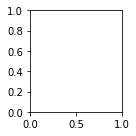

In [12]:
fig = plt.figure(figsize=(2,2),tight_layout=True,facecolor='white')
ax = plt.subplot(111)

dmc_where = np.where(feature_names_master=='DMC delay1')[0][0]
rect = patches.Rectangle((0, 0), 1, 1, linewidth=5, edgecolor='orange', facecolor='none')
ax.add_patch(rect)

plt.xlim([-1,2])
plt.ylim([-1,2])
remove_spines(ax)
ax.set_yticks([])
ax.set_xticks([])

figname = 'dmc_box_legend.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

figname = 'dmc_box_legend.png'
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

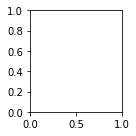

In [13]:
fig = plt.figure(figsize=(2,2),tight_layout=True,facecolor='white')
ax = plt.subplot(111)

memgo_where = np.where(feature_names_master=='Dly Go delay1')[0][0]
rect = patches.Rectangle((0, 0), 1, 1, linewidth=5, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.xlim([-1,2])
plt.ylim([-1,2])
remove_spines(ax)
ax.set_yticks([])
ax.set_xticks([])

figname = 'dlygo_box_legend.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

figname = 'dlygo_box_legend.png'
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')
plt.show()

In [24]:
# set of networks to compare
rnn_type_set = ['LeakyRNN',]
activation_set = ['softplus',]
w_init_set = ['diag',]
data_folder_set = ['lr',]
color_set = {}
color_set['lr'] = 'k'
color_set['untrained'] = 'dodgerblue'
color_set['no_noise'] = 'orangered'

seed_set = [str(1),]
max_d = 3.5
n_rnn = str(256)
x_ind_counter = 0
ax1_xticks = []
method = 'ward'

In [36]:
# set of networks to compare
rnn_type_set = ['LeakyRNN',]
activation_set = ['softplus',]
w_init_set = ['diag',]
data_folder_set = ['final/all',]
color_set = {}
color_set['lr'] = 'k'
color_set['untrained'] = 'dodgerblue'
color_set['no_noise'] = 'orangered'

seed_set = [str(1),]
max_d = 2.5
n_rnn = str(128)
x_ind_counter = 0
ax1_xticks = []
method = 'ward'
criterion = 'distance'
all_epochs = ['stim1','stim2','delay1','delay2','go1']
lr = -7

/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


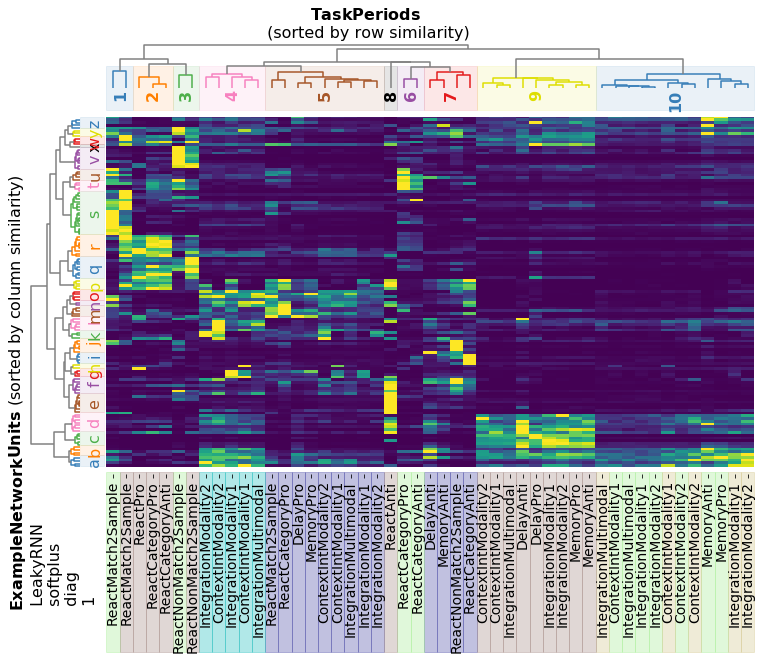

In [18]:
### load master network and make average correlation matrix across seeds
import matplotlib.patches as mpatches
for activation_i in range(len(activation_set)):
    for rnn_type_i in range(len(rnn_type_set)):
        for w_init_i in range(len(w_init_set)):
            for data_folder in data_folder_set:
            
#                 c = color_set[data_folder]
                rnn_type = rnn_type_set[rnn_type_i]
                activation = activation_set[activation_i]
                w_init = w_init_set[w_init_i]

                # x-axis and labelling bs
                if data_folder==data_folder_set[0]:
                    x_ind_counter+=1
                    label = ' '.join([rnn_type,activation,w_init])
                    if len(ax1_xticks)==0:
                        ax1_xticks = [label,]
                    else:
                        ax1_xticks.append(label)

                for seed in seed_set:
                    
                    if data_folder=='no_noise':
                        l2w = -0
                        l2h = -0
                    else:
                        l2w = -6
                        l2h = -6
                        
                    net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str

                    m_master = os.path.join(p,data_folder_all,data_folder,rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',
                                     net_name,seed)
                    label_master = ' '.join([rnn_type,activation,w_init,seed])

#                     lesion_folder = 'lesion_fps_hierarchical_'+method+'_'+criterion+'_max_d'+str(max_d)
#                     lesion_folder = 'lesion_fps_hierarchical_'+method+'_max_d'+str(max_d)
                    lesion_folder = 'lesion_fps_hierarchical_ward_distance_opt_clust'
                    save_dir = os.path.join(m_master,lesion_folder)
                    cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
                    feature_names_master = cluster_var['tick_names']

                    feature_names_labels = [feat_name.rsplit(' ', 1)[0] for feat_name in feature_names_master]
                    epoch_binary = {}
                    for e_name in ['delay1','delay2','go1','stim1','stim2']:
                        epoch_binary[e_name] = [feat_name.rsplit(' ', 1)[-1]==e_name for 
                                                feat_name in feature_names_master]

                    D = cluster_var['D'].T
                    feature_names_original = [cluster_var['tick_names'][s] for s in range(len(cluster_var['tick_names']))]
                    
                    feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
                    X = D[:,feat_order]

                    #visualize atlas for master network
                    fig = plt.figure(figsize=(18,9))
                    plt.rcParams.update({'font.size': 16})
                    legend_done = 0
                    atlas_width = .55
                    atlas_height = .55
                    thresh = 4

                    axdendro_top = fig.add_axes([.06,atlas_height+.09,atlas_width-.05,.07])
                    Y = sch.linkage(X.T, method=method)
                    clusters_top = fcluster(Y, thresh, criterion=criterion)
                    Z_top = sch.dendrogram(Y, orientation='top',#labels = clusters, #CA.ind_active #clusters
                                       leaf_font_size = 11,color_threshold=thresh,
                                              above_threshold_color='gray', labels = clusters_top)
#                     plt.text(-96,-18,'Task Period \n Cluster #')

                    cluster_size,mid_top = make_cluster_midpoint_labels(clusters_top)
                    for xi in range(len(mid_top)-1):
                        if cluster_size[xi]==1:
                            c = 'k'
                        else:
                            color_ind = xi - np.sum(cluster_size[:xi]==1)
                            c = color_palette[color_ind%len(color_palette)]
                        clust_mid = mid_top[xi]
                        rect=mpatches.Rectangle((5+10*(clust_mid-cluster_size[xi]/2),-5),cluster_size[xi]*10,10, 
                        fill=True,color=c,facecolor=c,alpha = .1,clip_on=False)
                        plt.gca().add_patch(rect)
                        plt.text(clust_mid*10,-3,str(clusters_top[int(clust_mid)]),color=c,fontweight='bold',rotation = 90)
#                         plt.text(xi*10,-15,str(clusters_sorted[int(xi)]))
                        
                    remove_spines(axdendro_top)
                    remove_ticks(axdendro_top)
                    axdendro_top.set_xticks([])

                    axdendro = fig.add_axes([0,.054,0.04,atlas_height*.98])
                    Y = sch.linkage(X, method=method)
                    clusters = fcluster(Y, max_d, criterion=criterion)
    
                    Z = sch.dendrogram(Y, orientation='left',#labels = clusters, #CA.ind_active #clusters
                                       leaf_font_size = 11,color_threshold=2.07,
                                              above_threshold_color='gray', labels = clusters)

                    clusters = cluster_var['clusters']
#                     Z = cluster_var['Z']
        
                    cluster_size, mid = make_cluster_midpoint_labels(clusters)
                    for xi in range(len(mid)-1):
                
                        if xi>22:
                            ci = xi-1
                        else:
                            ci = xi
                        
                        c = color_palette[ci%len(color_palette)]
                        
                        if xi==22:
                            c = 'k'
                            
                        clust_mid = mid[xi]
                        rect=mpatches.Rectangle((-5,10+10*(clust_mid-cluster_size[xi]/2)),5,cluster_size[xi]*10, 
                        fill=True,
                        color=c,facecolor=c,alpha = .1,clip_on=False)
                        plt.gca().add_patch(rect)
                        plt.text(-1.5,10*clust_mid-20,alphabet[clusters[int(clust_mid)]],color =c,rotation = 90)
                        
                    remove_spines(axdendro)
                    remove_ticks(axdendro)
                    axdendro.set_xticks([])


                    axmatrix = fig.add_axes([.06,0.045,atlas_width-.05,atlas_height])#fig.add_subplot(1,2,1)
                    index_top = Z['leaves']
                    X = X[index_top,:]
                    plt.imshow(X[-1:0:-1,:],cmap= 'viridis', aspect='auto')

                    len_te = len(feature_names_labels)
                    axmatrix.set_xticks(range(len_te))
                    task_labels = [task_name_dict[feat] for feat in feature_names_labels]
                    axmatrix.set_xticklabels(task_labels,fontsize = 14, rotation =90,ha = 'center')
#                     plot_epoch_labels(axmatrix,epoch_binary,which_axes = 'y',ms = 12.5)
                    plot_epoch_rects(axmatrix,epoch_binary,all_epochs,which_axes = 'y', rect_height = 1, rect_width = 65)
#                     plt.legend(bbox_to_anchor=(1.1, -.13),ncol=2,fontsize = 14,rotation = 90)    

                    plt.text(-8,len(X)/5,r"$\bf{Units}$"+' (sorted by column similarity)',rotation = 90)
                    plt.text(-8,1.2*len(X),r"$\bf{Example Network}$"+ ' \n '+' \n '.join(label_master.split()),rotation = 90)
                    axmatrix.set_xlabel(r"$\bf{Task Periods}$"+ ' \n (sorted by row similarity)')
                    axmatrix.xaxis.set_label_coords(.4, 1.31)
                    remove_spines(axmatrix)
                    axmatrix.set_yticks([])
                    plt.ylim((len(X)+1,0))

                    # make subpanels.
                    sp_width = .14
                    sp_wide = .2
                    offset = .06

                    label = '_'.join([rnn_type,activation,w_init,seed])
                    figname = os.path.join('atlas_final',label+'.pdf')
                    figpath_full = os.path.join(figpath,'atlas',data_folder)
                    if not os.path.exists(figpath_full):
                        os.makedirs(figpath_full)
                    plt.savefig(os.path.join(figpath_full,figname),bbox_inches = 'tight')

                    plt.show()

In [19]:
from tools_lnd import gen_trials_from_model_dir
def get_filename_fp(trial, epoch,t):
    ind_stim_loc  = 180*trial.y_loc[-1,t]/np.pi
    filename = epoch+'_'+str(round(ind_stim_loc,2))+'.npz'

    return filename, ind_stim_loc

In [20]:
'/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/tf_fixed_pts_manytrials/reviews/delaygo'


'/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/tf_fixed_pts_manytrials/reviews/delaygo'

In [23]:
lesion_folder = 'tf_fixed_pts_manytrials'
rule_set = ['delayanti','delayanti']
epoch_set = ['delay1',]
t_set = [0,0]
ri_axs = 0

epoch = epoch_set[ri_axs]
rule = rule_set[ri_axs]
trial_num = t_set[0]
trial = gen_trials_from_model_dir(m_master,rule,noise_on = False)
filename,_ = get_filename_fp(trial,epoch,trial_num)
f = os.path.join(m_master,lesion_folder,'reviews',rule,filename)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/mod

In [ ]:
f

In [104]:
e_start = max([0, trial.epochs.values()[epoch][0]])
end_set = [n_steps, trial.epochs.values()[epoch][1]]
e_end = min(x for x in end_set if x is not None)

In [105]:
h_end = h_tf[e_end,t,:]

(135, 160, 128)

In [101]:
m_master

'/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1'

In [74]:
inds_use = np.where(np.min(trial.stim_strength,axis=1)>.5)[0]

In [77]:
np.shape(trial.x[:,inds_use,:])

(125, 80, 20)

In [85]:
m = m_master

In [100]:
from network import FixedPoint_Model
from task import generate_trials, rule_name, rule_index_map,rules_dict
import tools
for rule in ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
              'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
              'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']:

    model = FixedPoint_Model(m)

    with tf.Session() as sess:
        model.restore()
        model._sigma=0
        # get all connection weights and biases as tensorflow variables
        var_list = model.var_list
        # evaluate the parameters after training
        params = [sess.run(var) for var in var_list]
        # get hparams
        hparams = model.hp
        # create a trial
        trial = generate_trials(rule, hparams, mode='test', noise_on=False, batch_size=40)# get feed_dict
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        # run model
        h_tf, y_hat_tf = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)  

        ##################################################################
        # get shapes  
        inds_use = np.where(np.min(trial.stim_strength,axis=1)>.5)[0]
        n_steps, n_trials, n_input_dim = np.shape(trial.x[:,inds_use,:])
        n_rnn = np.shape(h_tf)[2]
        n_output = np.shape(y_hat_tf)[2]

        # Fixed point finder hyperparameters
        # See FixedPointFinder.py for detailed descriptions of available
        # hyperparameters.
        fpf_hps = {'tol_q': 1e-6,'tol_unique': 1e-1}
        alr_dict = ({'decrease_factor' : .95, 'initial_rate' : 1})

        n_epochs = len(trial.epochs)
        for epoch in [1,]:#range(n_epochs):
            e_start = max([0, trial.epochs.values()[epoch][0]])
            end_set = [n_steps, trial.epochs.values()[epoch][1]]
            e_end = min(x for x in end_set if x is not None)

            n_inputs = 0
            input_set = {str(n_inputs) : np.zeros((1,n_input_dim))}
            print(rule)

            for t_ind in range(0,int(n_trials),int(n_trials/16)):

                t = inds_use[t_ind]
                print(trial.stim_strength[t,:])

Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
fdgo
[  1. 100. 100. 100.]
[100. 100.   1. 100.]
[  1. 100. 100. 100.]
[100. 100.   1. 100.]
[  1. 100. 100. 100.]
[100. 100.   1. 100.]
[  1. 100. 100. 100.]
[100. 100.   1. 100.]
[  1. 100. 100. 100.]
[100. 100.   1. 100.]
[  1. 100. 100. 100.]
[100. 100.   1. 100.]
[  1. 100. 100. 100.]
[100. 100.   1. 100.]
[  1. 100. 100. 100.]
[100. 

INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
contextdelaydm1
[0.8 1.2 0.8 1.2]
[1.  1.  0.8 1.2]
[0.8 1.2 0.8 1.2]
[1.  1.  0.8 1.2]
[0.8 1.2 0.8 1.2]
[1.  1.  0.8 1.2]
[0.8 1.2 0.8 1.2]
[1.  1.  0.8 1.2]
[0.8 1.2 0.8 1.2]
[1.  1.  0.8 1.2]
[0.8 1.2 0.8 1.2]
[1.  1.  0.8 1.2]
[0.8 1.2 0.8 1.2]
[1.  1.  0.8 1.2]
[0.8 1.2 0.8 1.2]
[1.  1.  0.8 1.2]
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters 

In [46]:
epoch_set = ['Stimulus1','Stimulus2','Memory1','Memory2','Response']

epoch_b = {}

for e_ind in range(len(epoch_set)):
    epoch_b[epoch_set[e_ind]] = np.zeros(len(epoch_set))
    epoch_b[epoch_set[e_ind]][e_ind] = 1

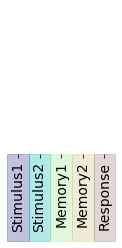

In [47]:
fig = plt.figure(figsize=(1.2,2))
ax = fig.add_axes([0,0,1,1])#fig.add_subplot(1,2,1)
ax.set_xticks(range(len(epoch_set)))
ax.set_xticklabels(epoch_set,fontsize = 14, rotation =90,ha = 'center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
# ax.set_xticks([])
    
plot_epoch_rects(ax,epoch_b,epoch_set,which_axes = 'y', rect_height = 1, rect_width = .6, ll = [-.6,0])
plt.savefig(os.path.join(figpath_full,'legend.pdf'),bbox_inches = 'tight')

/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axis.py:1096: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


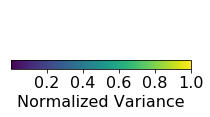

In [48]:
fig = plt.figure(figsize=(1,1),tight_layout=True,facecolor='white')
ax = fig.add_axes([0, 0, 2.5, 1])
plt.imshow(X[-1:0:-1,:],cmap= 'viridis', aspect='auto')
plt.xlim([0,-.1])
plt.ylim([0,-.1])
remove_spines(ax)
ax.set_yticks([])
ax.set_xticks([])
cbar = plt.colorbar(orientation="horizontal",fraction=0.5,pad=.5,anchor=(-.15,.5))
cbar.set_label('Normalized Variance')

figname = 'var_legend.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

figname = 'var_legend.png'
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')
plt.show()